In [13]:
# if using colab
if 0:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
runs_path = "/runs/"

In [16]:
# Load dataframes

# NOTE: Hits@50, 100 also available, for some 1000, 10000 aswell.

# GNN W DIVERSE FEATURES
GNN_100_laplacian_edge_features_hits_20 = pd.read_csv(runs_path + "GNN_100_laplacian_edge_features_hits_20.csv")
    
GNN_100_laplacian_node_features_hits_20 = pd.read_csv(runs_path + "GNN_100_laplacian_node_features_hits_20.csv")
    
GNN_original_5_SPD_features_hits_20 = pd.read_csv(runs_path + "GNN_original_5_SPD_features_hits_20.csv")


# NN SPD FEATURES
NN_4267_SPD_features_hits_20 = pd.read_csv(runs_path + "NN_4267_SPD_features_hits_20.csv")

NN_1000_SPD_features_hits_20 = pd.read_csv(runs_path + "NN_1000_SPD_features_hits_20.csv")

NN_500_SPD_features_hits_20 = pd.read_csv(runs_path + "NN_500_SPD_features_hits_20.csv")

NN_200_SPD_features_hits_20 = pd.read_csv(runs_path + "NN_200_SPD_features_hits_20.csv")

NN_100_SPD_features_hits_20 = pd.read_csv(runs_path + "NN_100_SPD_features_hits_20.csv")


# NN LAPLACIAN FEATURES
NN_4267_laplacian_features_hits_20 = pd.read_csv(runs_path + "NN_4267_laplacian_features_hits_20.csv")

NN_1000_laplacian_features_hits_20 = pd.read_csv(runs_path + "NN_1000_laplacian_features_hits_20.csv")

NN_500_laplacian_features_hits_20 = pd.read_csv(runs_path + "NN_500_laplacian_features_hits_20.csv")

NN_100_laplacian_features_hits_20 = pd.read_csv(runs_path + "NN_100_laplacian_features_hits_20.csv")


# ALT FORWARD FUNCTION
GNN_alt_5_SPD_features_hits_20 = pd.read_csv(runs_path + "GNN_alt_5_SPD_features_hits_20.csv")

NN_alt_200_SPD_features_hits_20 = pd.read_csv(runs_path + "NN_alt_200_SPD_features_hits_20.csv")

NN_alt_1000_laplacian_features_hits_20 = pd.read_csv(runs_path + "NN_alt_1000_laplacian_features_hits_20.csv")

NN_alt_100_laplacian_features_alt_hits_20 = pd.read_csv(runs_path + "NN_alt_100_laplacian_features_hits_20.csv")

#### Helper

In [17]:
def windowed_average(data, W):
  N = int(np.size(data)/W)
  windowed_average = np.zeros((N, 1))
  for i in range(N):
    windowed_average[i] = np.mean(data[i*W:i*W + W])
  
  return windowed_average

#### Figures summarizing main results (All are not included in report)

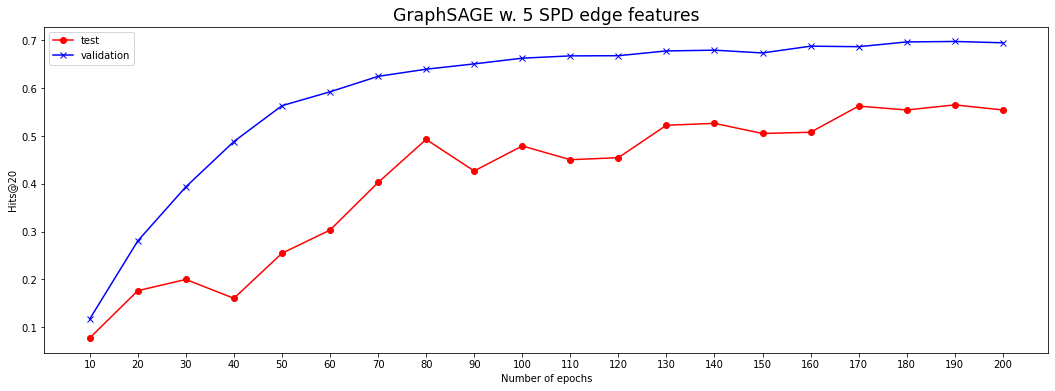

In [19]:
W = 10
GNN_original_5_SPD_features_hits_20_test_np = windowed_average(GNN_original_5_SPD_features_hits_20["1"].to_numpy(), W)
GNN_original_5_SPD_features_hits_20_val_np = windowed_average(GNN_original_5_SPD_features_hits_20["0"].to_numpy(), W)

plt.figure(figsize=(18, 6))
x = (np.arange(GNN_original_5_SPD_features_hits_20_test_np.shape[0])+1)*W
plt.xticks(x)
plt.title("GraphSAGE w. 5 SPD edge features", fontsize="xx-large")
plt.plot(x, GNN_original_5_SPD_features_hits_20_test_np, "o-", color="red", label="test")
plt.plot(x, GNN_original_5_SPD_features_hits_20_val_np, "x-", color="blue", label="validation")
plt.xlabel("Number of epochs")
plt.ylabel("Hits@20")
plt.legend()

plt.savefig("graphsage_baseline.pdf", bbox_inches='tight')


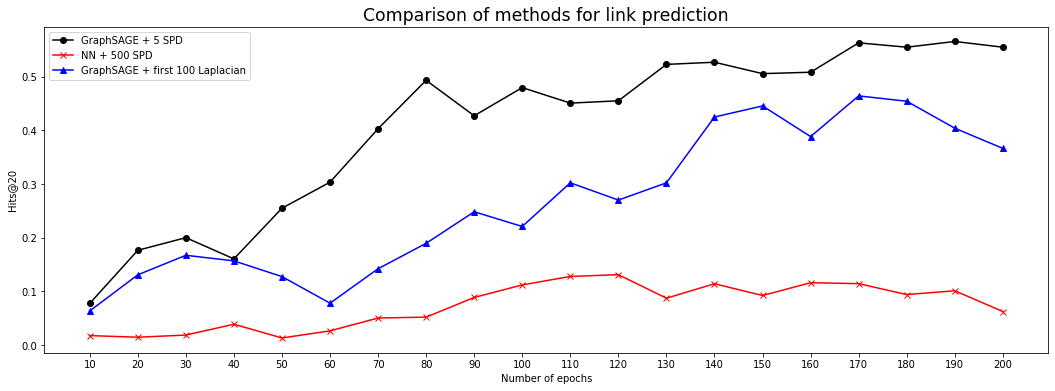

In [18]:
W = 10
GNN_original_5_SPD_features_hits_20_test_np = windowed_average(GNN_original_5_SPD_features_hits_20["1"].to_numpy(), W)
NN_500_SPD_features_hits_20_test_np = windowed_average(NN_500_SPD_features_hits_20["1"].to_numpy(), W)
GNN_100_laplacian_edge_features_hits_20_test_np = windowed_average(GNN_100_laplacian_edge_features_hits_20["1"].to_numpy(), W)

plt.figure(figsize=(18, 6))
x = (np.arange(GNN_original_5_SPD_features_hits_20_test_np.shape[0])+1)*W
plt.xticks(x)
plt.title("Comparison of methods for link prediction", fontsize="xx-large")

plt.plot(x, GNN_original_5_SPD_features_hits_20_test_np, "o-", color="black", label="GraphSAGE + 5 SPD")
plt.plot(x, NN_500_SPD_features_hits_20_test_np, "x-", color="red", label="NN + 500 SPD")
plt.plot(x, GNN_100_laplacian_edge_features_hits_20_test_np, "^-", color="blue", label="GraphSAGE + first 100 Laplacian")

plt.xlabel("Number of epochs")
plt.ylabel("Hits@20")
plt.legend()

plt.savefig("link_prediction_comparison.pdf", bbox_inches='tight')

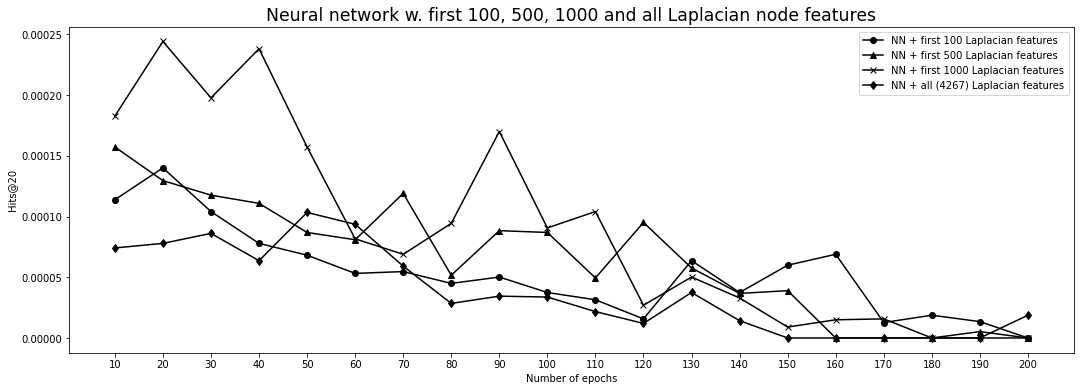

In [25]:
W = 10
NN_100_laplacian_features_hits_20_test_np = windowed_average(NN_100_laplacian_features_hits_20["1"].to_numpy(), W)
NN_500_laplacian_features_hits_20_test_np = windowed_average(NN_500_laplacian_features_hits_20["1"].to_numpy(), W)
NN_1000_laplacian_features_hits_20_test_np = windowed_average(NN_1000_laplacian_features_hits_20["1"].to_numpy(), W)
NN_4267_laplacian_features_hits_20_test_np = windowed_average(NN_4267_laplacian_features_hits_20["1"].to_numpy(), W)

plt.figure(figsize=(18, 6))
x = (np.arange(NN_500_SPD_features_hits_20_test_np.shape[0])+1)*W
plt.xticks(x)
plt.title("Neural network w. first 100, 500, 1000 and all Laplacian node features", fontsize="xx-large")
plt.plot(x, NN_100_laplacian_features_hits_20_test_np, "o-", color="black", label="NN + first 100 Laplacian features")
plt.plot(x, NN_500_laplacian_features_hits_20_test_np, "^-", color="black", label="NN + first 500 Laplacian features")
plt.plot(x, NN_1000_laplacian_features_hits_20_test_np, "x-", color="black", label="NN + first 1000 Laplacian features")
plt.plot(x, NN_4267_laplacian_features_hits_20_test_np, "d-", color="black", label="NN + all (4267) Laplacian features")
plt.xlabel("Number of epochs")
plt.ylabel("Hits@20")
plt.legend()

plt.savefig("NN_laplacian.pdf", bbox_inches='tight')

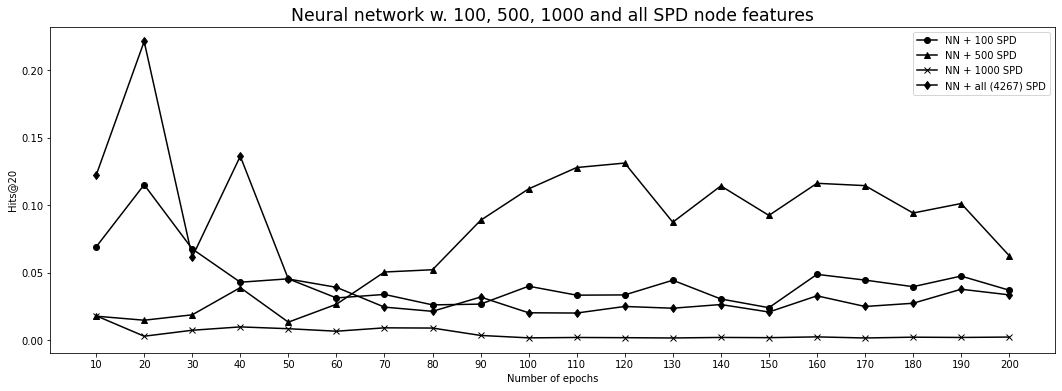

In [ ]:
W = 10
NN_4267_SPD_features_hits_20_test_np = windowed_average(NN_4267_SPD_features_hits_20["1"].to_numpy(), W)
NN_1000_SPD_features_hits_20_test_np = windowed_average(NN_1000_SPD_features_hits_20["1"].to_numpy(), W)
NN_500_SPD_features_hits_20_test_np = windowed_average(NN_500_SPD_features_hits_20["1"].to_numpy(), W)
NN_100_SPD_features_hits_20_test_np = windowed_average(NN_100_SPD_features_hits_20["1"].to_numpy(), W)


plt.figure(figsize=(18, 6))
x = (np.arange(NN_500_SPD_features_hits_20_test_np.shape[0])+1)*W
plt.xticks(x)
plt.title("Neural network w. 100, 500, 1000 and all SPD node features", fontsize="xx-large")

plt.plot(x, NN_100_SPD_features_hits_20_test_np, "o-", color="black", label="NN + 100 SPD")
plt.plot(x, NN_500_SPD_features_hits_20_test_np, "^-", color="black", label="NN + 500 SPD")
plt.plot(x, NN_1000_SPD_features_hits_20_test_np, "x-", color="black", label="NN + 1000 SPD")
plt.plot(x, NN_4267_SPD_features_hits_20_test_np, "d-", color="black", label="NN + all (4267) SPD")

plt.xlabel("Number of epochs")
plt.ylabel("Hits@20")
plt.legend()

plt.savefig("NN_SPD.pdf", bbox_inches='tight')

#### Get statistics for tables

In [22]:
W = 10
NN_4267_SPD_features_hits_20_test_np = windowed_average(NN_4267_SPD_features_hits_20["1"].to_numpy(), W)
NN_1000_SPD_features_hits_20_test_np = windowed_average(NN_1000_SPD_features_hits_20["1"].to_numpy(), W)
NN_500_SPD_features_hits_20_test_np = windowed_average(NN_500_SPD_features_hits_20["1"].to_numpy(), W)
NN_100_SPD_features_hits_20_test_np = windowed_average(NN_100_SPD_features_hits_20["1"].to_numpy(), W)

NN_100_laplacian_features_hits_20_test_np = windowed_average(NN_100_laplacian_features_hits_20["1"].to_numpy(), W)
NN_500_laplacian_features_hits_20_test_np = windowed_average(NN_500_laplacian_features_hits_20["1"].to_numpy(), W)
NN_1000_laplacian_features_hits_20_test_np = windowed_average(NN_1000_laplacian_features_hits_20["1"].to_numpy(), W)
NN_4267_laplacian_features_hits_20_test_np = windowed_average(NN_4267_laplacian_features_hits_20["1"].to_numpy(), W)

GNN_original_5_SPD_features_hits_20_test_np = windowed_average(GNN_original_5_SPD_features_hits_20["1"].to_numpy(), W)
NN_500_SPD_features_hits_20_test_np = windowed_average(NN_500_SPD_features_hits_20["1"].to_numpy(), W)
GNN_100_laplacian_edge_features_hits_20_test_np = windowed_average(GNN_100_laplacian_edge_features_hits_20["1"].to_numpy(), W)



In [23]:
NN_4267_SPD_max, NN_4267_SPD_max_epoch = np.max(NN_4267_SPD_features_hits_20_test_np), (np.where(NN_4267_SPD_features_hits_20_test_np == np.max(NN_4267_SPD_features_hits_20_test_np))[0][0]+1)*10
NN_1000_SPD_max, NN_1000_SPD_max_epoch = np.max(NN_1000_SPD_features_hits_20_test_np), (np.where(NN_1000_SPD_features_hits_20_test_np == np.max(NN_1000_SPD_features_hits_20_test_np))[0][0]+1)*10
NN_500_SPD_max, NN_500_SPD_max_epoch = np.max(NN_500_SPD_features_hits_20_test_np), (np.where(NN_500_SPD_features_hits_20_test_np == np.max(NN_500_SPD_features_hits_20_test_np))[0][0]+1)*10
NN_100_SPD_max, NN_100_SPD_max_epoch = np.max(NN_100_SPD_features_hits_20_test_np), (np.where(NN_100_SPD_features_hits_20_test_np == np.max(NN_100_SPD_features_hits_20_test_np))[0][0]+1)*10

NN_100_laplacian_max, NN_100_laplacian_max_epoch = np.max(NN_100_laplacian_features_hits_20_test_np), (np.where(NN_100_laplacian_features_hits_20_test_np == np.max(NN_100_laplacian_features_hits_20_test_np))[0][0]+1)*10
NN_500_laplacian_max, NN_500_laplacian_max_epoch = np.max(NN_500_laplacian_features_hits_20_test_np), (np.where(NN_500_laplacian_features_hits_20_test_np == np.max(NN_500_laplacian_features_hits_20_test_np))[0][0]+1)*10
NN_1000_laplacian_max, NN_1000_laplacian_max_epoch = np.max(NN_1000_laplacian_features_hits_20_test_np), (np.where(NN_1000_laplacian_features_hits_20_test_np == np.max(NN_1000_laplacian_features_hits_20_test_np))[0][0]+1)*10
NN_4267_laplacian_max, NN_4267_laplacian_max_epoch = np.max(NN_4267_laplacian_features_hits_20_test_np), (np.where(NN_4267_laplacian_features_hits_20_test_np == np.max(NN_4267_laplacian_features_hits_20_test_np))[0][0]+1)*10

GNN_original_5_SPD_max, GNN_original_5_SPD_max_epoch = np.max(GNN_original_5_SPD_features_hits_20_test_np), (np.where(GNN_original_5_SPD_features_hits_20_test_np == np.max(GNN_original_5_SPD_features_hits_20_test_np))[0][0]+1)*10
NN_500_SPD_max, NN_500_SPD_max_epoch = np.max(NN_500_SPD_features_hits_20_test_np), (np.where(NN_500_SPD_features_hits_20_test_np == np.max(NN_500_SPD_features_hits_20_test_np))[0][0]+1)*10
GNN_100_laplacian_max, GNN_100_laplacian_max_epoch = np.max(GNN_100_laplacian_edge_features_hits_20_test_np), (np.where(GNN_100_laplacian_edge_features_hits_20_test_np == np.max(GNN_100_laplacian_edge_features_hits_20_test_np))[0][0]+1)*10